각 파일에 대해:

월별(1월~12월) 판매액을 합산하여 '총판매액'을 만들고,

melt를 이용해 wide 형식의 데이터를 long 형식으로 변환합니다.

연도와 월 데이터를 결합해 기준일을 생성하여 시계열 인덱스로 활용합니다.

시계열 추세 그래프:

각 채널(내수, 수출, 해외 소매)별로 월별 판매액 추세를 꺾은선 그래프로 확인합니다.

계절성 분해 (Seasonal Decompose):

seasonal_decompose 함수를 사용해,

추세(Trend),

계절성(Seasonality),

잔차(Residual)
를 시각화하여, 각 채널의 시즌적 변동 패턴을 파악할 수 있습니다.

채널별 비교:

세 채널의 시계열 데이터를 하나의 DataFrame에 병합한 뒤,

한 그래프에 그려서 서로의 추세와 시즌성을 비교합니다.



In [78]:
import pandas as pd
df= pd.read_csv("../data/전처리 완료/현대_차종별판매실적.csv")
# 1~12월 컬럼 리스트
months = [f'{i}월' for i in range(1, 13)]

df['총판매량'] = df[months].sum(axis=1)

# Melt
df_long = df.melt(
    id_vars=['차량 모델', '연도', '판매 구분'],  # 내수/수출 구분 위해 '거래 유형' 포함
    value_vars=months, 
    var_name='월', 
    value_name='판매량'
)
df_long['월'] = df_long['월'].str.replace('월', '').astype(int)

# '기준일' 컬럼 생성
temp = df_long[['연도', '월']].rename(columns={'연도': 'year', '월': 'month'})
temp['day'] = 1
df_long['기준일'] = pd.to_datetime(temp)

df_long = df_long[df_long['기준일'] < '2025-02-01']
df_long['판매량'] = pd.to_numeric(df_long['판매량'], errors='coerce')

In [79]:
df_long

,차량 모델,연도,판매 구분,월,판매량,기준일
0,Avante (CN7),2023,내수용,1,5241.0,2023-01-01
1,Avante (CN7 HEV),2023,내수용,1,777.0,2023-01-01
2,Avante (CN7 N),2023,내수용,1,82.0,2023-01-01
3,IONIQ (AE HEV),2023,내수용,1,0.0,2023-01-01
4,IONIQ (AE PHEV),2023,내수용,1,0.0,2023-01-01
...,...,...,...,...,...,...
3909,IONIQ6 (CE),2024,내수용,12,12.0,2024-12-01
3910,IONIQ5 (NE),2024,수출용,12,9.0,2024-12-01
3911,IONIQ5 Robotaxi (NE R),2024,수출용,12,0.0,2024-12-01
3912,PV,2024,합계,12,5348.0,2024-12-01


In [80]:
# 내수 데이터
df_domestic_long = df_long[df_long['판매 구분'] == '내수용'].copy()
domestic_ts = df_domestic_long.groupby('기준일')['판매량'].sum()

# 수출 데이터
df_export_long = df_long[df_long['판매 구분'] == '수출용'].copy()
export_ts = df_export_long.groupby('기준일')['판매량'].sum()

total_ts = df_long.groupby('기준일')['판매량'].sum()


In [81]:
domestic_ts

기준일
2023-01-01     51503.0
2023-02-01     65015.0
2023-03-01     74529.0
2023-04-01     66660.0
2023-05-01     68680.0
2023-06-01     70163.0
2023-07-01     57503.0
2023-08-01     55555.0
2023-09-01     53911.0
2023-10-01     64328.0
2023-11-01     72058.0
2023-12-01     62172.0
2024-01-01    119749.0
2024-02-01    107917.0
2024-03-01    125843.0
2024-04-01    115965.0
2024-05-01    114643.0
2024-06-01    118465.0
2024-07-01    100115.0
2024-08-01    117126.0
2024-09-01    114947.0
2024-10-01    130872.0
2024-11-01    116621.0
2024-12-01    106341.0
2025-01-01     44736.0
Name: 판매량, dtype: float64

In [82]:
export_ts

기준일
2023-01-01     82211.0
2023-02-01     97970.0
2023-03-01    100066.0
2023-04-01    100603.0
2023-05-01    104751.0
2023-06-01    103948.0
2023-07-01     95451.0
2023-08-01     89850.0
2023-09-01     82613.0
2023-10-01    105267.0
2023-11-01     99949.0
2023-12-01    103063.0
2024-01-01     65400.0
2024-02-01     64698.0
2024-03-01     68276.0
2024-04-01     66706.0
2024-05-01     77101.0
2024-06-01     69731.0
2024-07-01     74825.0
2024-08-01     65215.0
2024-09-01     78384.0
2024-10-01     76406.0
2024-11-01     76786.0
2024-12-01     67827.0
2025-01-01     85701.0
Name: 판매량, dtype: float64

In [83]:
total_ts

기준일
2023-01-01    133714.0
2023-02-01    162985.0
2023-03-01    174595.0
2023-04-01    167263.0
2023-05-01    173431.0
2023-06-01    174111.0
2023-07-01    152954.0
2023-08-01    145405.0
2023-09-01    136524.0
2023-10-01    169595.0
2023-11-01    172007.0
2023-12-01    165235.0
2024-01-01    190481.0
2024-02-01    176774.0
2024-03-01    199209.0
2024-04-01    187847.0
2024-05-01    197228.0
2024-06-01    193009.0
2024-07-01    180273.0
2024-08-01    187208.0
2024-09-01    198938.0
2024-10-01    213229.0
2024-11-01    199338.0
2024-12-01    179606.0
2025-01-01    130437.0
Name: 판매량, dtype: float64

In [84]:
domestic_ts.to_csv("현대_내수_판매실적.csv")
export_ts.to_csv("현대_수출_판매실적.csv")
total_ts.to_csv("현대_판매실적.csv")

In [87]:
import os
print(os.getcwd())

/Users/marurun66/Documents/GitHub/manifest-mini/yeseul


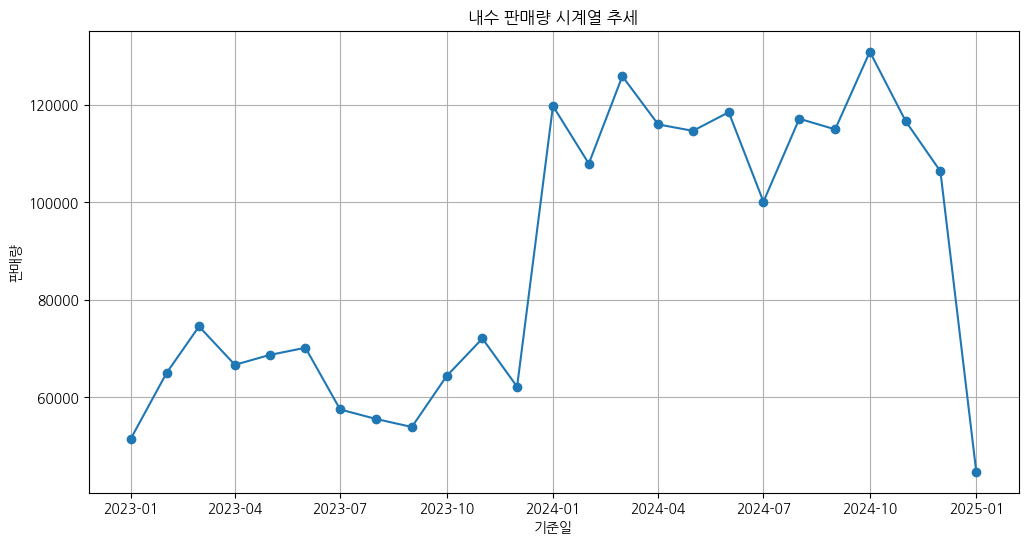

/opt/anaconda3/envs/hi/lib/python3.10/site-packages/statsmodels/tsa/seasonal.py:360: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.tight_layout()
/var/folders/wz/cf10k4857715p70flsxw2g9m0000gn/T/ipykernel_48006/874559279.py:21: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  plt.savefig("내수 판매량 시계열 분해.png")
/opt/anaconda3/envs/hi/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


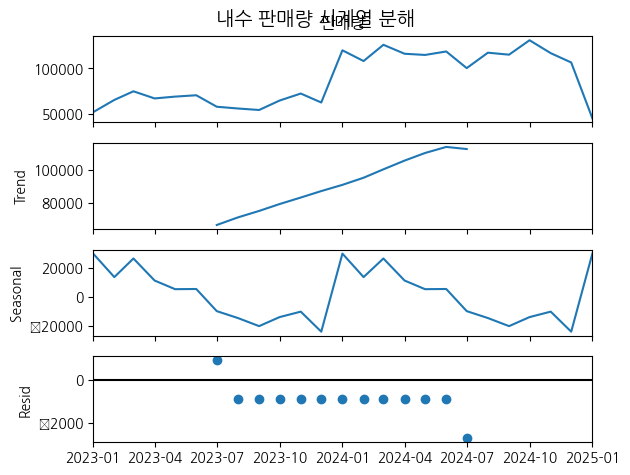

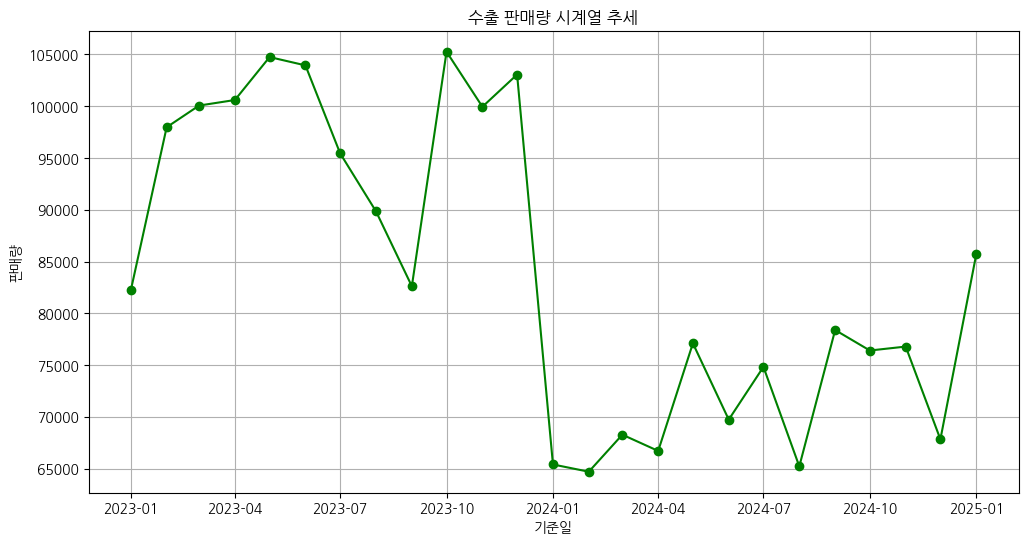

/opt/anaconda3/envs/hi/lib/python3.10/site-packages/statsmodels/tsa/seasonal.py:360: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.tight_layout()
/var/folders/wz/cf10k4857715p70flsxw2g9m0000gn/T/ipykernel_48006/874559279.py:39: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  plt.savefig("수출 판매량 시계열 분해.png")
/opt/anaconda3/envs/hi/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


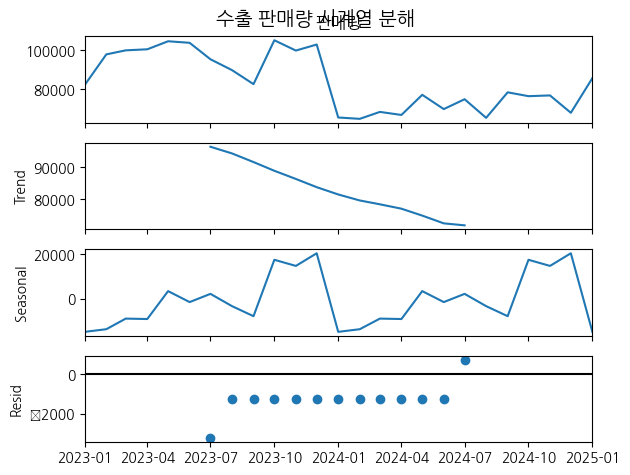

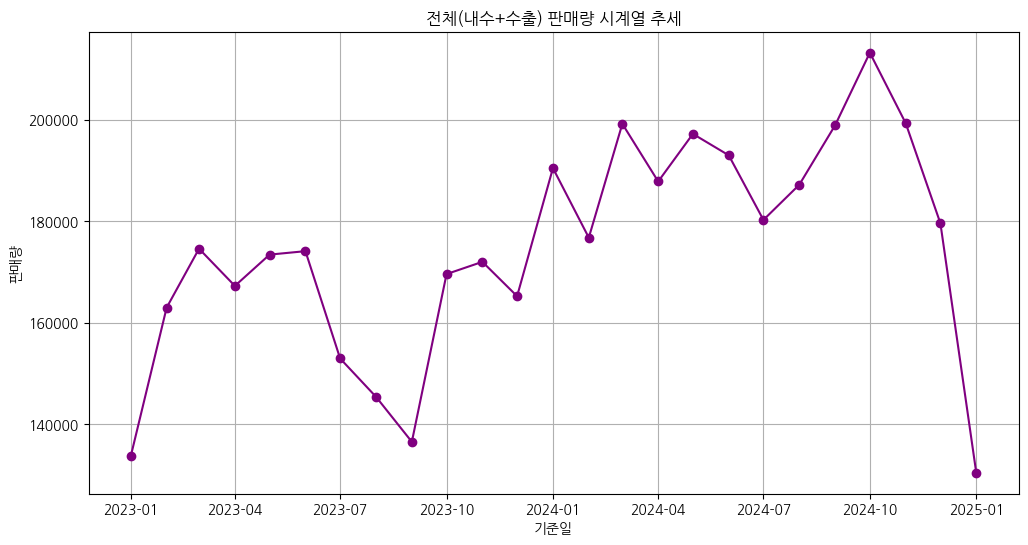

/opt/anaconda3/envs/hi/lib/python3.10/site-packages/statsmodels/tsa/seasonal.py:360: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.tight_layout()
/var/folders/wz/cf10k4857715p70flsxw2g9m0000gn/T/ipykernel_48006/874559279.py:57: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  plt.savefig("전체 판매량 시계열 분해.png")
/opt/anaconda3/envs/hi/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


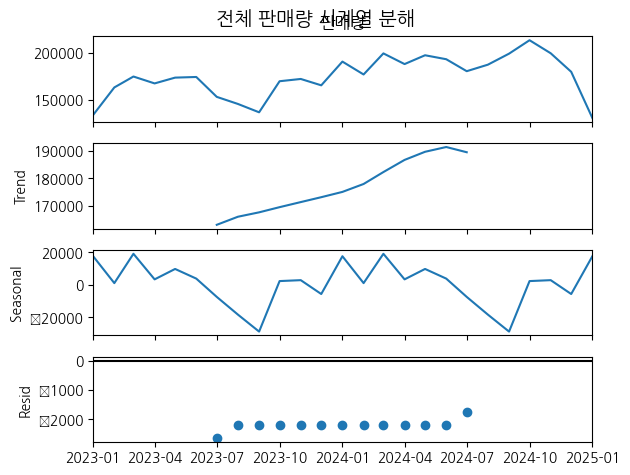

In [86]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

#한글 폰트 설정
plt.rc('font', family='NanumGothic')

# 내수 판매량 시계열 추세
plt.figure(figsize=(12,6))
plt.plot(domestic_ts.index, domestic_ts.values, marker='o')
plt.title("내수 판매량 시계열 추세")
plt.xlabel("기준일")
plt.ylabel("판매량")
plt.grid(True)
plt.savefig("내수 판매량 시계열 추세.png")
plt.show()

# 내수 판매량 시계열 분해
result_domestic = seasonal_decompose(domestic_ts, model='additive', period=12)
result_domestic.plot()
plt.suptitle("내수 판매량 시계열 분해", fontsize=14)
plt.savefig("내수 판매량 시계열 분해.png")
plt.show()


# 수출 판매량 시계열 추세
plt.figure(figsize=(12,6))
plt.plot(export_ts.index, export_ts.values, marker='o', color='green')
plt.title("수출 판매량 시계열 추세")
plt.xlabel("기준일")
plt.ylabel("판매량")
plt.grid(True)
plt.savefig("수출 판매량 시계열 추세.png")
plt.show()

# 수출 판매량 시계열 분해
result_export = seasonal_decompose(export_ts, model='additive', period=12)
result_export.plot()
plt.suptitle("수출 판매량 시계열 분해", fontsize=14)
plt.savefig("수출 판매량 시계열 분해.png")
plt.show()


# 전체(내수+수출) 판매량 시계열 추세
plt.figure(figsize=(12,6))
plt.plot(total_ts.index, total_ts.values, marker='o', color='purple')
plt.title("전체(내수+수출) 판매량 시계열 추세")
plt.xlabel("기준일")
plt.ylabel("판매량")
plt.grid(True)
plt.savefig("전체(내수+수출) 판매량 시계열 추세.png")
plt.show()

# 전체 판매량 시계열 분해
result_total = seasonal_decompose(total_ts, model='additive', period=12)
result_total.plot()
plt.suptitle("전체 판매량 시계열 분해", fontsize=14)
plt.savefig("전체 판매량 시계열 분해.png")
plt.show()